In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# format of raw data
raw_gas = pd.read_excel("./raw_data_01/In2O3-汽柴油.xlsx",sheet_name="汽油")
raw_gas[:22]

,温度,浓度,修饰量,In2O3,In2O3+Ru,In2O3+Rh,In2O3+Pd,In2O3+Pt,In2O3+La,In2O3+Ce,In2O3+Pr,In2O3+Nd,In2O3+Eu,In2O3+Sb,In2O3+Gd,In2O3+Ho
0,200℃,100ppm,0.005,1.2,1.3,1.6,1.8,1.3,1.5,1.8,1.5,1.6,1.5,1.6,2.6,1.6
1,NaN,NaN,0.004,NaN,1.2,1.7,1.6,1.4,1.4,1.8,1.5,1.5,1.6,1.5,2.6,1.8
2,NaN,NaN,0.003,NaN,1.2,1.7,1.7,1.5,1.4,1.6,1.5,1.6,1.6,1.5,2.7,1.8
3,NaN,NaN,0.002,NaN,1.3,1.8,1.6,1.4,1.4,1.6,1.4,1.2,1.5,1.4,2.5,1.5
4,NaN,NaN,0.001,NaN,1.3,1.9,1.6,1.4,1.4,1.6,1.4,1.5,1.6,1.1,2.7,1.5
5,NaN,70ppm,0.005,1.3,1.3,1.6,1.7,1.3,1.5,1.8,1.5,1.6,1.5,1.5,2.3,1.4
6,NaN,NaN,0.004,NaN,1.3,1.6,1.5,1.5,1.4,1.9,1.5,1.6,1.5,1.6,2.7,1.6
7,NaN,NaN,0.003,NaN,1.3,1.7,1.6,1.5,1.4,1.7,1.5,1.6,1.5,1.6,2.5,1.5
8,NaN,NaN,0.002,NaN,1.3,1.7,1.6,1.4,1.4,1.7,1.5,1.4,1.4,1.5,2.2,1.3
9,NaN,NaN,0.001,NaN,1.3,1.8,1.5,1.4,1.4,1.6,1.4,1.6,1.4,1.2,2.7,1.4


In [3]:
column_names = list(raw_gas.columns.values)
column_names

['温度',
 '浓度',
 '修饰量',
 'In2O3',
 'In2O3+Ru',
 'In2O3+Rh',
 'In2O3+Pd',
 'In2O3+Pt',
 'In2O3+La',
 'In2O3+Ce',
 'In2O3+Pr',
 'In2O3+Nd',
 'In2O3+Eu',
 'In2O3+Sb',
 'In2O3+Gd',
 'In2O3+Ho']

In [10]:
cln = list(map(lambda x: x.replace('温度', 'temperature'), column_names))
cln = list(map(lambda x: x.replace('浓度', 'density'), cln))
cln = list(map(lambda x: x.replace('修饰量', 'resp_density'), cln))
for idx in range(len(cln)):
    element_pairs = cln[idx].split("+")
    if len(element_pairs)>1 and element_pairs[0] == "In2O3":
        print(cln[idx])
        cln[idx] = element_pairs[1]
    if cln[idx]=="In2O3":
        cln[idx] = "in2o3"
           
cln

In2O3+Ru
In2O3+Rh
In2O3+Pd
In2O3+Pt
In2O3+La
In2O3+Ce
In2O3+Pr
In2O3+Nd
In2O3+Eu
In2O3+Sb
In2O3+Gd
In2O3+Ho


['temperature',
 'density',
 'resp_density',
 'in2o3',
 'Ru',
 'Rh',
 'Pd',
 'Pt',
 'La',
 'Ce',
 'Pr',
 'Nd',
 'Eu',
 'Sb',
 'Gd',
 'Ho']

In [11]:
raw_gas.columns=cln
raw_gas[:25]

,temperature,density,resp_density,in2o3,Ru,Rh,Pd,Pt,La,Ce,Pr,Nd,Eu,Sb,Gd,Ho
0,200,100,0.005,1.2,1.3,1.6,1.8,1.3,1.5,1.8,1.5,1.6,1.5,1.6,2.6,1.6
1,200,100,0.004,1.2,1.2,1.7,1.6,1.4,1.4,1.8,1.5,1.5,1.6,1.5,2.6,1.8
2,200,100,0.003,1.2,1.2,1.7,1.7,1.5,1.4,1.6,1.5,1.6,1.6,1.5,2.7,1.8
3,200,100,0.002,1.2,1.3,1.8,1.6,1.4,1.4,1.6,1.4,1.2,1.5,1.4,2.5,1.5
4,200,100,0.001,1.2,1.3,1.9,1.6,1.4,1.4,1.6,1.4,1.5,1.6,1.1,2.7,1.5
5,200,70,0.005,1.3,1.3,1.6,1.7,1.3,1.5,1.8,1.5,1.6,1.5,1.5,2.3,1.4
6,200,70,0.004,1.3,1.3,1.6,1.5,1.5,1.4,1.9,1.5,1.6,1.5,1.6,2.7,1.6
7,200,70,0.003,1.3,1.3,1.7,1.6,1.5,1.4,1.7,1.5,1.6,1.5,1.6,2.5,1.5
8,200,70,0.002,1.3,1.3,1.7,1.6,1.4,1.4,1.7,1.5,1.4,1.4,1.5,2.2,1.3
9,200,70,0.001,1.3,1.3,1.8,1.5,1.4,1.4,1.6,1.4,1.6,1.4,1.2,2.7,1.4


In [12]:
curr_val = 0
temp_tail = "℃"
for r in range(len(raw_gas)):
    # if not nan, update mod_val
    curr_cell =raw_gas.iloc[r,0]
    if not pd.isna(curr_cell):
        # currflag = "250℃"
        curr_val = curr_cell.replace(temp_tail,"")
        raw_gas.iloc[r,0]=curr_val
    else:
        # if nan, set val
        raw_gas.iloc[r,0]=curr_val
        
curr_val = 0
temp_tail = "ppm"
for r in range(len(raw_gas)):
    # if not nan, update mod_val
    curr_cell =raw_gas.iloc[r,1]
    if not pd.isna(curr_cell):
        # currflag = "250℃"
        curr_val = curr_cell.replace(temp_tail,"")
        raw_gas.iloc[r,1]=curr_val
    else:
        # if nan, set val
        raw_gas.iloc[r,1]=curr_val
        
curr_val = 0
for r in range(len(raw_gas)):
    # if not nan, update mod_val
    curr_cell =raw_gas.iloc[r,3]
    if not pd.isna(curr_cell):
        # currflag = "250℃"
        curr_val = curr_cell
    else:
        # if nan, set val
        raw_gas.iloc[r,3]=curr_val

In [14]:
raw_gas

,temperature,density,resp_density,in2o3,Ru,Rh,Pd,Pt,La,Ce,Pr,Nd,Eu,Sb,Gd,Ho
0,200,100,0.005,1.2,1.3,1.6,1.8,1.3,1.5,1.8,1.5,1.6,1.5,1.6,2.6,1.6
1,200,100,0.004,1.2,1.2,1.7,1.6,1.4,1.4,1.8,1.5,1.5,1.6,1.5,2.6,1.8
2,200,100,0.003,1.2,1.2,1.7,1.7,1.5,1.4,1.6,1.5,1.6,1.6,1.5,2.7,1.8
3,200,100,0.002,1.2,1.3,1.8,1.6,1.4,1.4,1.6,1.4,1.2,1.5,1.4,2.5,1.5
4,200,100,0.001,1.2,1.3,1.9,1.6,1.4,1.4,1.6,1.4,1.5,1.6,1.1,2.7,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,400,30,0.005,1.9,1.9,2.7,3.4,1.9,2.7,2.5,2.5,2.0,1.8,2.0,3.6,3.0
101,400,30,0.004,1.9,2.0,2.7,3.0,2.2,2.4,2.7,2.5,1.8,1.6,2.4,3.3,3.3
102,400,30,0.003,1.9,2.4,3.3,3.3,2.1,2.5,2.4,2.4,2.1,1.7,2.3,3.8,2.9
103,400,30,0.002,1.9,2.1,3.7,3.1,2.1,2.3,2.3,2.2,1.4,1.6,2.0,3.6,2.4


In [15]:
raw_gas_exp= pd.read_excel("./raw_data_02/example.xlsx",sheet_name="汽油")
column_names = list(raw_gas_exp.columns.values)

column_names

['金属氧化物',
 '气体种类',
 '温度/℃',
 '浓度ppm',
 '修饰浓度',
 'In2O3响应值',
 'In2O3+Ru',
 'In2O3+Rh',
 'In2O3+Pd',
 'In2O3+Pt',
 'In2O3+La',
 'In2O3+Ce',
 'In2O3+Pr',
 'In2O3+Nd',
 'In2O3+Eu',
 'In2O3+Sb',
 'In2O3+Gd',
 'In2O3+Ho']

In [27]:
column_names = list(map(lambda x: x.replace('金属氧化物', 'metal_ox'), column_names))
column_names = list(map(lambda x: x.replace('气体种类', 'gas_cate'), column_names))
column_names = list(map(lambda x: x.replace('浓度ppm', 'density'), column_names))
column_names = list(map(lambda x: x.replace('温度/℃', 'temperature'), column_names))
column_names = list(map(lambda x: x.replace('修饰浓度', 'resp_densi'), column_names))
column_names = list(map(lambda x: x.replace('温度/℃', 'temperature'), column_names))
column_names = list(map(lambda x: x.replace('In2O3响应值', 'none'), column_names))
column_names

['metal_ox',
 'gas_cate',
 'temperature',
 'density',
 'resp_densi',
 'resp_val',
 'In2O3+Ru',
 'In2O3+Rh',
 'In2O3+Pd',
 'In2O3+Pt',
 'In2O3+La',
 'In2O3+Ce',
 'In2O3+Pr',
 'In2O3+Nd',
 'In2O3+Eu',
 'In2O3+Sb',
 'In2O3+Gd',
 'In2O3+Ho']

In [29]:
for idx in range(len(column_names)):
    element_pairs = column_names[idx].split("+")
    
    if len(element_pairs)>1 and element_pairs[0] == "In2O3":
        print(column_names[idx])
        column_names[idx] = element_pairs[1]
    if column_names[idx]=="In2O3":
        column_names[idx] = "comparison"
column_names

['metal_ox',
 'gas_cate',
 'temperature',
 'density',
 'resp_densi',
 'resp_val',
 'Ru',
 'Rh',
 'Pd',
 'Pt',
 'La',
 'Ce',
 'Pr',
 'Nd',
 'Eu',
 'Sb',
 'Gd',
 'Ho']

In [30]:
raw_gas_exp.columns=column_names
raw_gas_exp[:25]

,metal_ox,gas_cate,temperature,density,resp_densi,resp_val,Ru,Rh,Pd,Pt,La,Ce,Pr,Nd,Eu,Sb,Gd,Ho
0,In2O3,汽油挥发物,200,100,0.005,1.2,1.3,1.6,1.8,1.3,1.5,1.8,1.5,1.6,1.5,1.6,2.6,1.6
1,In2O3,汽油挥发物,200,100,0.004,1.2,1.2,1.7,1.6,1.4,1.4,1.8,1.5,1.5,1.6,1.5,2.6,1.8
2,In2O3,汽油挥发物,200,100,0.003,1.2,1.2,1.7,1.7,1.5,1.4,1.6,1.5,1.6,1.6,1.5,2.7,1.8
3,In2O3,汽油挥发物,200,100,0.002,1.2,1.3,1.8,1.6,1.4,1.4,1.6,1.4,1.2,1.5,1.4,2.5,1.5
4,In2O3,汽油挥发物,200,100,0.001,1.2,1.3,1.9,1.6,1.4,1.4,1.6,1.4,1.5,1.6,1.1,2.7,1.5
5,In2O3,汽油挥发物,200,70,0.005,1.3,1.3,1.6,1.7,1.3,1.5,1.8,1.5,1.6,1.5,1.5,2.3,1.4
6,In2O3,汽油挥发物,200,70,0.004,1.3,1.3,1.6,1.5,1.5,1.4,1.9,1.5,1.6,1.5,1.6,2.7,1.6
7,In2O3,汽油挥发物,200,70,0.003,1.3,1.3,1.7,1.6,1.5,1.4,1.7,1.5,1.6,1.5,1.6,2.5,1.5
8,In2O3,汽油挥发物,200,70,0.002,1.3,1.3,1.7,1.6,1.4,1.4,1.7,1.5,1.4,1.4,1.5,2.2,1.3
9,In2O3,汽油挥发物,200,70,0.001,1.3,1.3,1.8,1.5,1.4,1.4,1.6,1.4,1.6,1.4,1.2,2.7,1.4


In [32]:
# diesel volatiles
for r in range(len(raw_gas_exp)):
    # if not nan, update mod_val
    raw_gas_exp.iloc[r,1] = "diesel_volatiles"
raw_gas_exp

,metal_ox,gas_cate,temperature,density,resp_densi,resp_val,Ru,Rh,Pd,Pt,La,Ce,Pr,Nd,Eu,Sb,Gd,Ho
0,In2O3,diesel_volatiles,200,100,0.005,1.2,1.3,1.6,1.8,1.3,1.5,1.8,1.5,1.6,1.5,1.6,2.6,1.6
1,In2O3,diesel_volatiles,200,100,0.004,1.2,1.2,1.7,1.6,1.4,1.4,1.8,1.5,1.5,1.6,1.5,2.6,1.8
2,In2O3,diesel_volatiles,200,100,0.003,1.2,1.2,1.7,1.7,1.5,1.4,1.6,1.5,1.6,1.6,1.5,2.7,1.8
3,In2O3,diesel_volatiles,200,100,0.002,1.2,1.3,1.8,1.6,1.4,1.4,1.6,1.4,1.2,1.5,1.4,2.5,1.5
4,In2O3,diesel_volatiles,200,100,0.001,1.2,1.3,1.9,1.6,1.4,1.4,1.6,1.4,1.5,1.6,1.1,2.7,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,In2O3,diesel_volatiles,400,30,0.005,1.9,1.9,2.7,3.4,1.9,2.7,2.5,2.5,2.0,1.8,2.0,3.6,3.0
96,In2O3,diesel_volatiles,400,30,0.004,1.9,2.0,2.7,3.0,2.2,2.4,2.7,2.5,1.8,1.6,2.4,3.3,3.3
97,In2O3,diesel_volatiles,400,30,0.003,1.9,2.4,3.3,3.3,2.1,2.5,2.4,2.4,2.1,1.7,2.3,3.8,2.9
98,In2O3,diesel_volatiles,400,30,0.002,1.9,2.1,3.7,3.1,2.1,2.3,2.3,2.2,1.4,1.6,2.0,3.6,2.4


In [35]:
for r in range(len(raw_gas_exp)):
    print(raw_gas_exp.iloc[r])

  metal_ox          gas_cate  temperature  density  resp_densi  resp_val   Ru  \
2    In2O3  diesel_volatiles          200      100       0.003       1.2  1.2   

    Rh   Pd   Pt   La   Ce   Pr   Nd   Eu   Sb   Gd   Ho  
2  1.7  1.7  1.5  1.4  1.6  1.5  1.6  1.6  1.5  2.7  1.8  
  metal_ox          gas_cate  temperature  density  resp_densi  resp_val   Ru  \
2    In2O3  diesel_volatiles          200      100       0.003       1.2  1.2   

    Rh   Pd   Pt   La   Ce   Pr   Nd   Eu   Sb   Gd   Ho  
2  1.7  1.7  1.5  1.4  1.6  1.5  1.6  1.6  1.5  2.7  1.8  
  metal_ox          gas_cate  temperature  density  resp_densi  resp_val   Ru  \
2    In2O3  diesel_volatiles          200      100       0.003       1.2  1.2   

    Rh   Pd   Pt   La   Ce   Pr   Nd   Eu   Sb   Gd   Ho  
2  1.7  1.7  1.5  1.4  1.6  1.5  1.6  1.6  1.5  2.7  1.8  
  metal_ox          gas_cate  temperature  density  resp_densi  resp_val   Ru  \
2    In2O3  diesel_volatiles          200      100       0.003       1.2  1.

In [48]:
test_row = raw_gas_exp.iloc[0]
print(test_row[0])
print(test_row[1])
print(test_row[2])
print(test_row[3])
print(test_row[4])
print()
print(test_row[5])
print(test_row[6])
print(test_row[7])
print(test_row[8])
print(test_row[9])
print(test_row[10])
print(test_row[11])
print(test_row[12])
print(test_row[13])
print(test_row[14])
print(test_row[15])
print(test_row[16])
print(test_row[17])



In2O3
diesel_volatiles
200
100
0.005

1.2
1.3
1.6
1.8
1.3
1.5
1.8
1.5
1.6
1.5
1.6
2.6
1.6


In [82]:
# split dataframe.
base_val = raw_gas_exp.iloc[:,[0,1,2,3,4]]
result_val = raw_gas_exp.iloc[:,[5,6,7,8,9,10,11,12,13,14,15,16,17]]


In [54]:
base_val

,metal_ox,gas_cate,temperature,density,resp_densi
0,In2O3,diesel_volatiles,200,100,0.005
1,In2O3,diesel_volatiles,200,100,0.004
2,In2O3,diesel_volatiles,200,100,0.003
3,In2O3,diesel_volatiles,200,100,0.002
4,In2O3,diesel_volatiles,200,100,0.001
...,...,...,...,...,...
95,In2O3,diesel_volatiles,400,30,0.005
96,In2O3,diesel_volatiles,400,30,0.004
97,In2O3,diesel_volatiles,400,30,0.003
98,In2O3,diesel_volatiles,400,30,0.002


In [55]:
result_val

,resp_val,Ru,Rh,Pd,Pt,La,Ce,Pr,Nd,Eu,Sb,Gd,Ho
0,1.2,1.3,1.6,1.8,1.3,1.5,1.8,1.5,1.6,1.5,1.6,2.6,1.6
1,1.2,1.2,1.7,1.6,1.4,1.4,1.8,1.5,1.5,1.6,1.5,2.6,1.8
2,1.2,1.2,1.7,1.7,1.5,1.4,1.6,1.5,1.6,1.6,1.5,2.7,1.8
3,1.2,1.3,1.8,1.6,1.4,1.4,1.6,1.4,1.2,1.5,1.4,2.5,1.5
4,1.2,1.3,1.9,1.6,1.4,1.4,1.6,1.4,1.5,1.6,1.1,2.7,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.9,1.9,2.7,3.4,1.9,2.7,2.5,2.5,2.0,1.8,2.0,3.6,3.0
96,1.9,2.0,2.7,3.0,2.2,2.4,2.7,2.5,1.8,1.6,2.4,3.3,3.3
97,1.9,2.4,3.3,3.3,2.1,2.5,2.4,2.4,2.1,1.7,2.3,3.8,2.9
98,1.9,2.1,3.7,3.1,2.1,2.3,2.3,2.2,1.4,1.6,2.0,3.6,2.4


In [81]:
column_names

['metal_ox',
 'gas_cate',
 'temperature',
 'density',
 'resp_densi',
 'resp_val',
 'Ru',
 'Rh',
 'Pd',
 'Pt',
 'La',
 'Ce',
 'Pr',
 'Nd',
 'Eu',
 'Sb',
 'Gd',
 'Ho']

In [71]:
# 相关性
raw_gas_exp


,metal_ox,gas_cate,temperature,density,resp_densi,resp_val,Ru,Rh,Pd,Pt,La,Ce,Pr,Nd,Eu,Sb,Gd,Ho
0,In2O3,diesel_volatiles,200,100,0.005,1.2,1.3,1.6,1.8,1.3,1.5,1.8,1.5,1.6,1.5,1.6,2.6,1.6
1,In2O3,diesel_volatiles,200,100,0.004,1.2,1.2,1.7,1.6,1.4,1.4,1.8,1.5,1.5,1.6,1.5,2.6,1.8
2,In2O3,diesel_volatiles,200,100,0.003,1.2,1.2,1.7,1.7,1.5,1.4,1.6,1.5,1.6,1.6,1.5,2.7,1.8
3,In2O3,diesel_volatiles,200,100,0.002,1.2,1.3,1.8,1.6,1.4,1.4,1.6,1.4,1.2,1.5,1.4,2.5,1.5
4,In2O3,diesel_volatiles,200,100,0.001,1.2,1.3,1.9,1.6,1.4,1.4,1.6,1.4,1.5,1.6,1.1,2.7,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,In2O3,diesel_volatiles,400,30,0.005,1.9,1.9,2.7,3.4,1.9,2.7,2.5,2.5,2.0,1.8,2.0,3.6,3.0
96,In2O3,diesel_volatiles,400,30,0.004,1.9,2.0,2.7,3.0,2.2,2.4,2.7,2.5,1.8,1.6,2.4,3.3,3.3
97,In2O3,diesel_volatiles,400,30,0.003,1.9,2.4,3.3,3.3,2.1,2.5,2.4,2.4,2.1,1.7,2.3,3.8,2.9
98,In2O3,diesel_volatiles,400,30,0.002,1.9,2.1,3.7,3.1,2.1,2.3,2.3,2.2,1.4,1.6,2.0,3.6,2.4


In [87]:
list(raw_gas_exp.iloc[[0]])
raw_gas_exp

,metal_ox,gas_cate,temperature,density,resp_densi,resp_val,Ru,Rh,Pd,Pt,La,Ce,Pr,Nd,Eu,Sb,Gd,Ho
0,In2O3,diesel_volatiles,200,100,0.005,1.2,1.3,1.6,1.8,1.3,1.5,1.8,1.5,1.6,1.5,1.6,2.6,1.6
1,In2O3,diesel_volatiles,200,100,0.004,1.2,1.2,1.7,1.6,1.4,1.4,1.8,1.5,1.5,1.6,1.5,2.6,1.8
2,In2O3,diesel_volatiles,200,100,0.003,1.2,1.2,1.7,1.7,1.5,1.4,1.6,1.5,1.6,1.6,1.5,2.7,1.8
3,In2O3,diesel_volatiles,200,100,0.002,1.2,1.3,1.8,1.6,1.4,1.4,1.6,1.4,1.2,1.5,1.4,2.5,1.5
4,In2O3,diesel_volatiles,200,100,0.001,1.2,1.3,1.9,1.6,1.4,1.4,1.6,1.4,1.5,1.6,1.1,2.7,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,In2O3,diesel_volatiles,400,30,0.005,1.9,1.9,2.7,3.4,1.9,2.7,2.5,2.5,2.0,1.8,2.0,3.6,3.0
96,In2O3,diesel_volatiles,400,30,0.004,1.9,2.0,2.7,3.0,2.2,2.4,2.7,2.5,1.8,1.6,2.4,3.3,3.3
97,In2O3,diesel_volatiles,400,30,0.003,1.9,2.4,3.3,3.3,2.1,2.5,2.4,2.4,2.1,1.7,2.3,3.8,2.9
98,In2O3,diesel_volatiles,400,30,0.002,1.9,2.1,3.7,3.1,2.1,2.3,2.3,2.2,1.4,1.6,2.0,3.6,2.4


In [97]:
data_2d=[]
column_names
for row in range(len(raw_gas_exp)):
    # print(raw_gas_exp.iloc[[row]])
    data = list(raw_gas_exp.iloc[row])
    print(data)
    # print(tmp)
    tmp = data[0:5]
    for col in range(5, len(data)):
        tmp.append(column_names[col])

        tmp.append(data[col])
        data_2d.append(tmp)
        tmp = data[0:5]
data_2d

['In2O3', 'diesel_volatiles', 200, 100, 0.005, 1.2, 1.3, 1.6, 1.8, 1.3, 1.5, 1.8, 1.5, 1.6, 1.5, 1.6, 2.6, 1.6]
['In2O3', 'diesel_volatiles', 200, 100, 0.004, 1.2, 1.2, 1.7, 1.6, 1.4, 1.4, 1.8, 1.5, 1.5, 1.6, 1.5, 2.6, 1.8]
['In2O3', 'diesel_volatiles', 200, 100, 0.003, 1.2, 1.2, 1.7, 1.7, 1.5, 1.4, 1.6, 1.5, 1.6, 1.6, 1.5, 2.7, 1.8]
['In2O3', 'diesel_volatiles', 200, 100, 0.002, 1.2, 1.3, 1.8, 1.6, 1.4, 1.4, 1.6, 1.4, 1.2, 1.5, 1.4, 2.5, 1.5]
['In2O3', 'diesel_volatiles', 200, 100, 0.001, 1.2, 1.3, 1.9, 1.6, 1.4, 1.4, 1.6, 1.4, 1.5, 1.6, 1.1, 2.7, 1.5]
['In2O3', 'diesel_volatiles', 200, 70, 0.005, 1.3, 1.3, 1.6, 1.7, 1.3, 1.5, 1.8, 1.5, 1.6, 1.5, 1.5, 2.3, 1.4]
['In2O3', 'diesel_volatiles', 200, 70, 0.004, 1.3, 1.3, 1.6, 1.5, 1.5, 1.4, 1.9, 1.5, 1.6, 1.5, 1.6, 2.7, 1.6]
['In2O3', 'diesel_volatiles', 200, 70, 0.003, 1.3, 1.3, 1.7, 1.6, 1.5, 1.4, 1.7, 1.5, 1.6, 1.5, 1.6, 2.5, 1.5]
['In2O3', 'diesel_volatiles', 200, 70, 0.002, 1.3, 1.3, 1.7, 1.6, 1.4, 1.4, 1.7, 1.5, 1.4, 1.4, 1.5, 2.2, 1

[['In2O3', 'diesel_volatiles', 200, 100, 0.005, 'resp_val', 1.2],
 ['In2O3', 'diesel_volatiles', 200, 100, 0.005, 'Ru', 1.3],
 ['In2O3', 'diesel_volatiles', 200, 100, 0.005, 'Rh', 1.6],
 ['In2O3', 'diesel_volatiles', 200, 100, 0.005, 'Pd', 1.8],
 ['In2O3', 'diesel_volatiles', 200, 100, 0.005, 'Pt', 1.3],
 ['In2O3', 'diesel_volatiles', 200, 100, 0.005, 'La', 1.5],
 ['In2O3', 'diesel_volatiles', 200, 100, 0.005, 'Ce', 1.8],
 ['In2O3', 'diesel_volatiles', 200, 100, 0.005, 'Pr', 1.5],
 ['In2O3', 'diesel_volatiles', 200, 100, 0.005, 'Nd', 1.6],
 ['In2O3', 'diesel_volatiles', 200, 100, 0.005, 'Eu', 1.5],
 ['In2O3', 'diesel_volatiles', 200, 100, 0.005, 'Sb', 1.6],
 ['In2O3', 'diesel_volatiles', 200, 100, 0.005, 'Gd', 2.6],
 ['In2O3', 'diesel_volatiles', 200, 100, 0.005, 'Ho', 1.6],
 ['In2O3', 'diesel_volatiles', 200, 100, 0.004, 'resp_val', 1.2],
 ['In2O3', 'diesel_volatiles', 200, 100, 0.004, 'Ru', 1.2],
 ['In2O3', 'diesel_volatiles', 200, 100, 0.004, 'Rh', 1.7],
 ['In2O3', 'diesel_volatiles

In [105]:

df = pd.DataFrame(data_2d, columns =['metal_ox', 'gas_cate','temperature','density','resp_density','metal','resp_val']) 
df.to_csv("modified_data.csv",index=False)

In [106]:
df

,metal_ox,gas_cate,temperature,density,resp_density,metal,resp_val
0,In2O3,diesel_volatiles,200,100,0.005,resp_val,1.2
1,In2O3,diesel_volatiles,200,100,0.005,Ru,1.3
2,In2O3,diesel_volatiles,200,100,0.005,Rh,1.6
3,In2O3,diesel_volatiles,200,100,0.005,Pd,1.8
4,In2O3,diesel_volatiles,200,100,0.005,Pt,1.3
...,...,...,...,...,...,...,...
1295,In2O3,diesel_volatiles,400,30,0.001,Nd,1.6
1296,In2O3,diesel_volatiles,400,30,0.001,Eu,1.8
1297,In2O3,diesel_volatiles,400,30,0.001,Sb,1.1
1298,In2O3,diesel_volatiles,400,30,0.001,Gd,4.1


In [107]:
# 单词翻译 
# 苯 benzene
# 甲苯 toluene
# 二甲苯 Xylene
# 甲醛 formaldehyde
# 汽油 gasoline
# 柴油 diesel fuel



In [2]:
# format of raw data
wo3_benzene = pd.read_excel("./files_未调整格式/WO3.xlsx",sheet_name="苯")
wo3_toluene = pd.read_excel("./files_未调整格式/WO3.xlsx",sheet_name="甲苯")
wo3_xylene = pd.read_excel("./files_未调整格式/WO3.xlsx",sheet_name="二甲苯")
wo3_formaldehyde = pd.read_excel("./files_未调整格式/WO3.xlsx",sheet_name="甲醛")
wo3_gasoline = pd.read_excel("./files_未调整格式/WO3.xlsx",sheet_name="汽油")
wo3_diesel_fuel = pd.read_excel("./files_未调整格式/WO3.xlsx",sheet_name="柴油")
wo3_h2 = pd.read_excel("./files_未调整格式/WO3.xlsx",sheet_name="H2")
wo3_ch4 = pd.read_excel("./files_未调整格式/WO3.xlsx",sheet_name="CH4")




In [3]:
df_list= [ wo3_benzene,
          wo3_toluene,
          wo3_xylene,
          wo3_formaldehyde,
          wo3_gasoline,
          wo3_diesel_fuel,
          wo3_h2,
          wo3_ch4
          ]

In [4]:
# col_names = list(wo3_benzene.head())
# col_names


In [5]:
# rename title
def renameChineseElemenets(df):
    
    col_names =list(df.head())
    # print(col_names)


    
    for i in range(2,len(col_names)):
        t = col_names[i].split("#")
        col_names[i] = t[1]
        
    col_names[0] = "density_temp"
    col_names[1] = "gas_density"
    
    print(col_names)
    
    df.columns=col_names
    
    return df


# df = renameChinese(wo3_benzene)
df_list_renaming = []

for df in df_list:
    df_list_renaming.append(renameChineseElemenets(df))


['density_temp', 'gas_density', 'Y', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Ho', 'Er', 'Yb', 'Sb']
['density_temp', 'gas_density', 'Y', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Ho', 'Er', 'Yb', 'Sb']
['density_temp', 'gas_density', 'Y', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Ho', 'Er', 'Yb', 'Sb']
['density_temp', 'gas_density', 'Y', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Ho', 'Er', 'Yb', 'Sb']
['density_temp', 'gas_density', 'Y', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Ho', 'Er', 'Yb', 'Sb']
['density_temp', 'gas_density', 'Y', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Ho', 'Er', 'Yb', 'Sb']
['density_temp', 'gas_density', 'Y', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Ho', 'Er', 'Yb', 'Sb']
['density_temp', 'gas_density', 'Y', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Ho', 'Er', 'Yb', 'Sb']


In [6]:
for d in df_list_renaming:
    print(d[:5])

  density_temp gas_density    Y   La   Ce   Pr   Nd   Sm   Eu   Gd   Ho   Er  \
0  100ppm,400℃     0.0%（2）  1.5  1.7  1.5  2.1  1.3  1.7  1.9  1.6  1.6  2.5   
1          NaN     0.1%（5）  1.5  1.5  1.4  1.8  1.4  1.7  1.7  1.7  1.6  2.3   
2          NaN     0.2%（4）  1.5  1.5  1.3  2.0  1.8  1.6  1.8  1.6  1.6  2.3   
3          NaN     0.3%（7）  1.7  1.6  1.3  2.1  2.1  1.6  1.7  1.6  1.7  2.3   
4          NaN     0.4%（3）  1.5  1.5  1.3  2.3  1.4  1.6  1.8  1.8  1.6  2.0   

    Yb   Sb  
0  2.0  1.3  
1  1.8  1.2  
2  2.0  1.2  
3  2.0  1.2  
4  1.9  1.2  
  density_temp gas_density    Y   La   Ce   Pr   Nd   Sm   Eu   Gd   Ho   Er  \
0  100ppm,400℃     0.0%（2）  1.5  1.6  1.4  2.3  1.3  1.7  1.8  1.6  1.7  2.9   
1          NaN     0.1%（5）  1.4  1.4  1.3  2.0  1.2  1.7  1.6  1.7  1.6  2.8   
2          NaN     0.2%（4）  1.6  1.5  1.2  2.5  1.1  1.6  1.7  1.6  1.5  2.8   
3          NaN     0.3%（7）  1.9  1.5  1.2  2.5  1.0  1.7  1.5  1.5  1.8  2.9   
4          NaN     0.4%（3）  1.6  1.

In [7]:
# fill all the blank shit
def fill_blanks_df(df, col):
    curr_val = 0
    for r in range(len(df)):
        # if not nan, update mod_val
        curr_cell =df.iloc[r,col]
        if not pd.isna(curr_cell):
            # currflag = "250℃"
            curr_val = curr_cell
            # df.iloc[r,col]=curr_val
        else:
            # if nan, set val
            df.iloc[r,col]=curr_val
    return df

def fill_blanks(df_list):
    d_list = []
    for d in df_list:
        d_list.append(fill_blanks_df(df,0))
    
    return d_list




def split_dataframe_df(df):
    pass


def split_dataframe(df_list):
    pass

def rename_gas_density_df(df):
    pass 


def rename_gas_density(df_list):
    pass 



In [8]:
blank_filled = fill_blanks(df_list_renaming)
print(len(blank_filled))
for bf in blank_filled:
    print(bf[:10])

8
   density_temp gas_density     Y    La    Ce    Pr    Nd   Sm    Eu    Gd  \
0  1000ppm,400℃     0.0%（2）  37.6  26.5  13.4  19.9  32.9  6.3  29.7  16.4   
1  1000ppm,400℃     0.1%（5）  28.9  22.4  12.3  30.3  42.4  6.3  23.5  19.3   
2  1000ppm,400℃     0.2%（4）  32.9  18.5   9.5  28.9  41.2  5.8  22.5  19.0   
3  1000ppm,400℃     0.3%（7）  34.1  22.7   9.1  21.9  38.9  5.7  20.1  17.3   
4  1000ppm,400℃     0.4%（3）  33.5  20.2   7.3  22.2  39.0  6.0  22.8  16.9   
5  1000ppm,400℃     0.5%（1）  32.6  23.7   6.2  20.6  32.7  5.7  34.3  17.6   
6  1000ppm,350℃     0.0%（2）  33.8  25.5  11.7  17.6  33.2  7.6  27.1  12.3   
7  1000ppm,350℃     0.1%（5）  19.9  21.4   9.8  28.9  42.9  7.5  20.4  15.8   
8  1000ppm,350℃     0.2%（4）  31.2  17.3   7.5  26.2  43.2  7.0  20.4  14.5   
9  1000ppm,350℃     0.3%（7）  30.3  22.3   7.2  20.3  39.8  7.0  16.5  13.5   

     Ho    Er   Yb   Sb  
0  17.5  11.8  4.9  9.3  
1  19.7  16.1  4.2  6.1  
2  16.8  16.0  4.1  8.1  
3  19.4  15.3  5.1  8.6  
4  23.3  

In [9]:
#  test = blank_filled[0]
test =  blank_filled[0].copy()

In [10]:
test[['density','temperature']] = test.density_temp.str.split(",",expand=True)
# test.head()  

test_col_names =list(test.head())
test_col_names

['density_temp',
 'gas_density',
 'Y',
 'La',
 'Ce',
 'Pr',
 'Nd',
 'Sm',
 'Eu',
 'Gd',
 'Ho',
 'Er',
 'Yb',
 'Sb',
 'density',
 'temperature']

In [11]:
test[:10]

,density_temp,gas_density,Y,La,Ce,Pr,Nd,Sm,Eu,Gd,Ho,Er,Yb,Sb,density,temperature
0,"1000ppm,400℃",0.0%（2）,37.6,26.5,13.4,19.9,32.9,6.3,29.7,16.4,17.5,11.8,4.9,9.3,1000ppm,400℃
1,"1000ppm,400℃",0.1%（5）,28.9,22.4,12.3,30.3,42.4,6.3,23.5,19.3,19.7,16.1,4.2,6.1,1000ppm,400℃
2,"1000ppm,400℃",0.2%（4）,32.9,18.5,9.5,28.9,41.2,5.8,22.5,19.0,16.8,16.0,4.1,8.1,1000ppm,400℃
3,"1000ppm,400℃",0.3%（7）,34.1,22.7,9.1,21.9,38.9,5.7,20.1,17.3,19.4,15.3,5.1,8.6,1000ppm,400℃
4,"1000ppm,400℃",0.4%（3）,33.5,20.2,7.3,22.2,39.0,6.0,22.8,16.9,23.3,14.1,4.1,8.3,1000ppm,400℃
5,"1000ppm,400℃",0.5%（1）,32.6,23.7,6.2,20.6,32.7,5.7,34.3,17.6,22.3,14.9,3.5,8.8,1000ppm,400℃
6,"1000ppm,350℃",0.0%（2）,33.8,25.5,11.7,17.6,33.2,7.6,27.1,12.3,17.0,11.0,3.0,2.5,1000ppm,350℃
7,"1000ppm,350℃",0.1%（5）,19.9,21.4,9.8,28.9,42.9,7.5,20.4,15.8,19.7,15.1,3.0,1.5,1000ppm,350℃
8,"1000ppm,350℃",0.2%（4）,31.2,17.3,7.5,26.2,43.2,7.0,20.4,14.5,16.2,14.8,2.7,2.6,1000ppm,350℃
9,"1000ppm,350℃",0.3%（7）,30.3,22.3,7.2,20.3,39.8,7.0,16.5,13.5,19.9,14.6,3.8,2.7,1000ppm,350℃


In [12]:
a = test.drop(['density_temp'], axis=1)
a_header = a.columns.tolist()

a_header.insert(0, a_header[-1])
a_header.insert(0, a_header[-2])
a_header.pop()
a_header.pop()
test = test[a_header] 
test

,density,temperature,gas_density,Y,La,Ce,Pr,Nd,Sm,Eu,Gd,Ho,Er,Yb,Sb
0,1000ppm,400℃,0.0%（2）,37.6,26.5,13.4,19.9,32.9,6.3,29.7,16.4,17.5,11.8,4.9,9.3
1,1000ppm,400℃,0.1%（5）,28.9,22.4,12.3,30.3,42.4,6.3,23.5,19.3,19.7,16.1,4.2,6.1
2,1000ppm,400℃,0.2%（4）,32.9,18.5,9.5,28.9,41.2,5.8,22.5,19.0,16.8,16.0,4.1,8.1
3,1000ppm,400℃,0.3%（7）,34.1,22.7,9.1,21.9,38.9,5.7,20.1,17.3,19.4,15.3,5.1,8.6
4,1000ppm,400℃,0.4%（3）,33.5,20.2,7.3,22.2,39.0,6.0,22.8,16.9,23.3,14.1,4.1,8.3
5,1000ppm,400℃,0.5%（1）,32.6,23.7,6.2,20.6,32.7,5.7,34.3,17.6,22.3,14.9,3.5,8.8
6,1000ppm,350℃,0.0%（2）,33.8,25.5,11.7,17.6,33.2,7.6,27.1,12.3,17.0,11.0,3.0,2.5
7,1000ppm,350℃,0.1%（5）,19.9,21.4,9.8,28.9,42.9,7.5,20.4,15.8,19.7,15.1,3.0,1.5
8,1000ppm,350℃,0.2%（4）,31.2,17.3,7.5,26.2,43.2,7.0,20.4,14.5,16.2,14.8,2.7,2.6
9,1000ppm,350℃,0.3%（7）,30.3,22.3,7.2,20.3,39.8,7.0,16.5,13.5,19.9,14.6,3.8,2.7


In [13]:
def columns_reshapte(df):
    target =  df.copy()
    target[['density','temperature']] = target.density_temp.str.split(",",expand=True)
    target.drop(['density_temp'], axis=1)
    header = a.columns.tolist()
    header.insert(0, a_header[-1])
    header.insert(0, a_header[-2])
    header.pop()
    header.pop()
    target = target[a_header]
    
    return target
dftest =  blank_filled[0].copy()
df_test_after = columns_reshapte(dftest)

In [17]:
df_test_after

,density,temperature,gas_density,Y,La,Ce,Pr,Nd,Sm,Eu,Gd,Ho,Er,Yb,Sb
0,1000ppm,400℃,0.0%（2）,37.6,26.5,13.4,19.9,32.9,6.3,29.7,16.4,17.5,11.8,4.9,9.3
1,1000ppm,400℃,0.1%（5）,28.9,22.4,12.3,30.3,42.4,6.3,23.5,19.3,19.7,16.1,4.2,6.1
2,1000ppm,400℃,0.2%（4）,32.9,18.5,9.5,28.9,41.2,5.8,22.5,19.0,16.8,16.0,4.1,8.1
3,1000ppm,400℃,0.3%（7）,34.1,22.7,9.1,21.9,38.9,5.7,20.1,17.3,19.4,15.3,5.1,8.6
4,1000ppm,400℃,0.4%（3）,33.5,20.2,7.3,22.2,39.0,6.0,22.8,16.9,23.3,14.1,4.1,8.3
5,1000ppm,400℃,0.5%（1）,32.6,23.7,6.2,20.6,32.7,5.7,34.3,17.6,22.3,14.9,3.5,8.8
6,1000ppm,350℃,0.0%（2）,33.8,25.5,11.7,17.6,33.2,7.6,27.1,12.3,17.0,11.0,3.0,2.5
7,1000ppm,350℃,0.1%（5）,19.9,21.4,9.8,28.9,42.9,7.5,20.4,15.8,19.7,15.1,3.0,1.5
8,1000ppm,350℃,0.2%（4）,31.2,17.3,7.5,26.2,43.2,7.0,20.4,14.5,16.2,14.8,2.7,2.6
9,1000ppm,350℃,0.3%（7）,30.3,22.3,7.2,20.3,39.8,7.0,16.5,13.5,19.9,14.6,3.8,2.7


In [21]:
test1 = df_test_after.copy()
# pdata['time'].apply(lambda x:x[:-4])

test1['density']=test1['density'].apply(lambda x:x[:-3])
test1['temperature']=test1['temperature'].apply(lambda x:x[:-1])
test1['gas_density'] = test1['gas_density'].apply(lambda x:x[:-3])

# df_test_after['col'] =  df_test_after['col'].str.extract('(\d+)').astype(int)
# df.location.str.strip('()')
test1.insert(0, 'metal_ox', 'wo2')
test1.insert(1, 'gas_cate', 'benzene')


test1[:5]

,metal_ox,gas_cate,density,temperature,gas_density,Y,La,Ce,Pr,Nd,Sm,Eu,Gd,Ho,Er,Yb,Sb
0,wo2,benzene,1000,400,0.0%,37.6,26.5,13.4,19.9,32.9,6.3,29.7,16.4,17.5,11.8,4.9,9.3
1,wo2,benzene,1000,400,0.1%,28.9,22.4,12.3,30.3,42.4,6.3,23.5,19.3,19.7,16.1,4.2,6.1
2,wo2,benzene,1000,400,0.2%,32.9,18.5,9.5,28.9,41.2,5.8,22.5,19.0,16.8,16.0,4.1,8.1
3,wo2,benzene,1000,400,0.3%,34.1,22.7,9.1,21.9,38.9,5.7,20.1,17.3,19.4,15.3,5.1,8.6
4,wo2,benzene,1000,400,0.4%,33.5,20.2,7.3,22.2,39.0,6.0,22.8,16.9,23.3,14.1,4.1,8.3


In [22]:
test1_1 = test1.copy()

list(test1_1.head())




['metal_ox',
 'gas_cate',
 'density',
 'temperature',
 'gas_density',
 'Y',
 'La',
 'Ce',
 'Pr',
 'Nd',
 'Sm',
 'Eu',
 'Gd',
 'Ho',
 'Er',
 'Yb',
 'Sb']

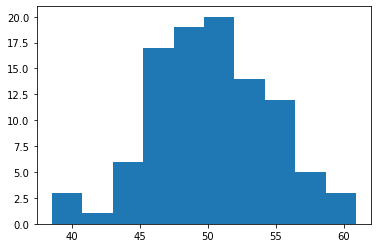

In [23]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# histogram plot
pyplot.hist(data)
pyplot.show()

In [36]:
import pandas as pd
df = pd.read_csv("dataset.csv")
df["resp_val"] = pd.to_numeric(df["resp_val"])
data = list(df["resp_val"])
data


[1.5,
 1.7,
 1.5,
 2.1,
 1.3,
 1.7,
 1.9,
 1.6,
 1.6,
 2.5,
 2.0,
 1.3,
 1.5,
 1.5,
 1.4,
 1.8,
 1.4,
 1.7,
 1.7,
 1.7,
 1.6,
 2.3,
 1.8,
 1.2,
 1.5,
 1.5,
 1.3,
 2.0,
 1.8,
 1.6,
 1.8,
 1.6,
 1.6,
 2.3,
 2.0,
 1.2,
 1.7,
 1.6,
 1.3,
 2.1,
 2.1,
 1.6,
 1.7,
 1.6,
 1.7,
 2.3,
 2.0,
 1.2,
 1.5,
 1.5,
 1.3,
 2.3,
 1.4,
 1.6,
 1.8,
 1.8,
 1.6,
 2.0,
 1.9,
 1.2,
 1.5,
 1.6,
 1.2,
 2.2,
 1.2,
 1.6,
 1.9,
 1.6,
 1.6,
 2.2,
 2.2,
 1.3,
 1.4,
 1.7,
 1.4,
 2.0,
 1.7,
 1.6,
 1.8,
 1.5,
 1.7,
 2.4,
 1.7,
 1.3,
 1.1,
 1.4,
 1.2,
 1.5,
 2.2,
 1.6,
 1.6,
 1.6,
 1.7,
 2.3,
 1.5,
 1.2,
 1.5,
 1.4,
 1.2,
 1.7,
 3.6,
 1.5,
 1.8,
 1.5,
 1.6,
 2.4,
 1.6,
 1.3,
 1.7,
 1.5,
 1.2,
 1.7,
 4.1,
 1.4,
 1.6,
 1.5,
 1.8,
 2.4,
 1.6,
 1.3,
 1.4,
 1.4,
 1.2,
 1.7,
 2.1,
 1.4,
 1.7,
 1.7,
 1.6,
 2.0,
 1.6,
 1.2,
 1.5,
 1.5,
 1.1,
 1.6,
 1.4,
 1.5,
 2.0,
 1.5,
 1.6,
 2.3,
 1.6,
 1.3,
 1.4,
 1.7,
 1.3,
 1.9,
 1.3,
 1.5,
 1.8,
 1.5,
 1.9,
 2.2,
 1.4,
 1.3,
 1.1,
 1.4,
 1.2,
 1.4,
 1.7,
 1.5,
 1.7,
 1.7,
 1.9,
 2.1,
 1.3

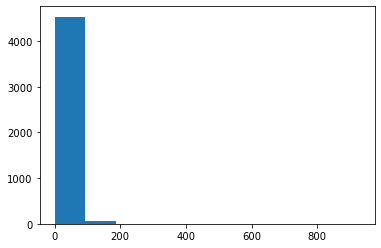

In [37]:

pyplot.hist(data)
pyplot.show()

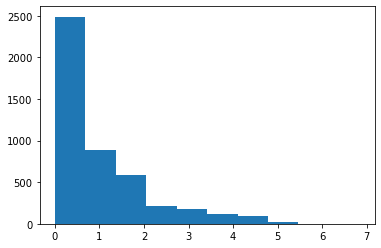

In [32]:
import numpy as np

lndata = np.log(data)
pyplot.hist(lndata)
pyplot.show()

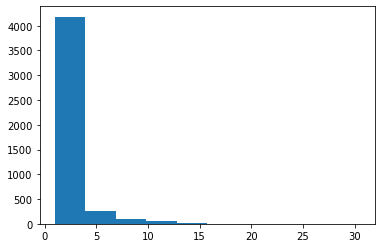

In [33]:
sqrtdata = np.sqrt(data)
pyplot.hist(sqrtdata)
pyplot.show()

In [40]:
from sklearn import preprocessing
dataa = [[i] for i in data]
scaler = preprocessing.StandardScaler().fit(dataa)
scaler

StandardScaler()

In [41]:
scaler.mean_

array([7.66881727])

In [42]:
X_scaled = scaler.transform(dataa)
X_scaled

array([[-0.23129737],
       [-0.22379845],
       [-0.23129737],
       ...,
       [-0.24629521],
       [-0.24629521],
       [-0.24629521]])

In [43]:
X_normalized = preprocessing.normalize(dataa, norm='l2')
X_normalized

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

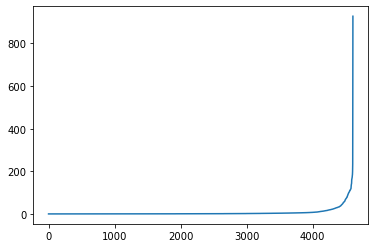

In [46]:
# sqrtdata = np.sqrt(data)
data.sort()
plt.scatter(x, y)
plt.show()